In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.51 s)


## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

## Duration

In [9]:
sim.set_duration(1e7)

## Tissue growth

In [10]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [11]:
sim.enable_division(contraction=0)
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Dilution volumes

In [12]:
#sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [13]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 1.2, "view_size": 60})

# Visualization of the initial state

<IPython.core.display.Javascript object>


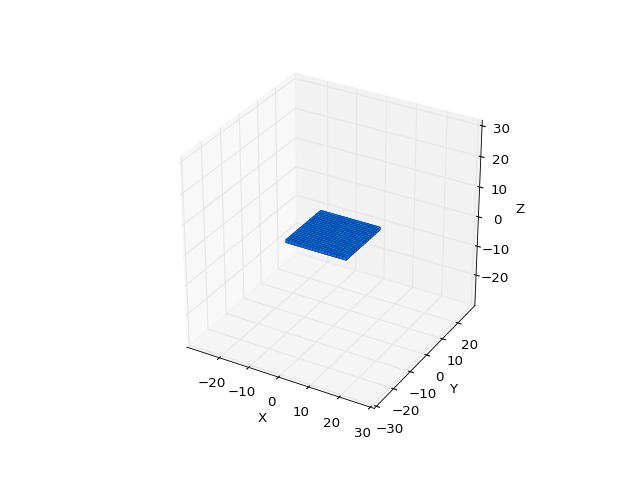

c_a: from 0.28010342798 to 0.309422002048
c_h: from 4.36653129372 to 4.43315861209


In [14]:
sim.renderer.display("c_a")

# Simulation

Growth step #0
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 22.4059147835 seconds
Growth of the tissue: 0.494149923325 seconds
Cell divisions: 0.56948184967 seconds


<IPython.core.display.Javascript object>


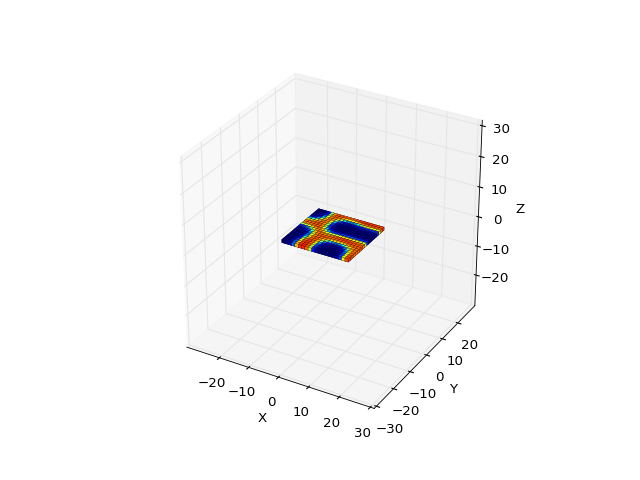

c_a: from 0.00047822521078 to 1.04881970922
c_h: from 3.17306704516 to 4.29800240919
Growth step #1
Jacobian computation: started
Jacobian computation: finished (0.03 s)
Integration of the ODE system: 3.60999894142 seconds
Growth of the tissue: 0.601586103439 seconds
Cell divisions: 0.634698152542 seconds


<IPython.core.display.Javascript object>


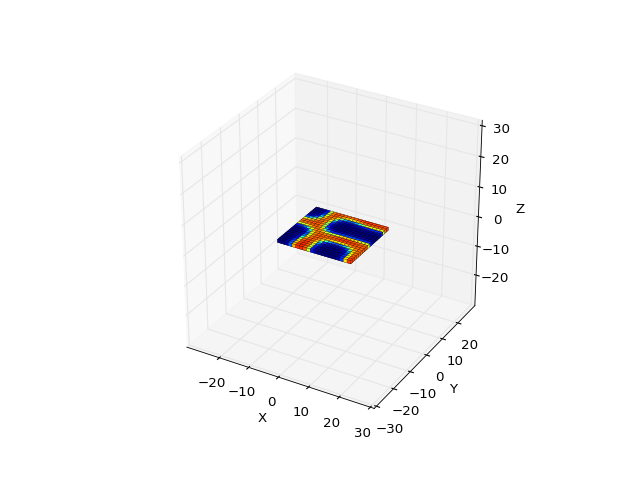

c_a: from 0.000325846595329 to 1.04375140571
c_h: from 2.70480838086 to 3.72607659156
Growth step #2
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 3.5334379673 seconds
Growth of the tissue: 0.493099927902 seconds
Cell divisions: 0.554399967194 seconds


<IPython.core.display.Javascript object>


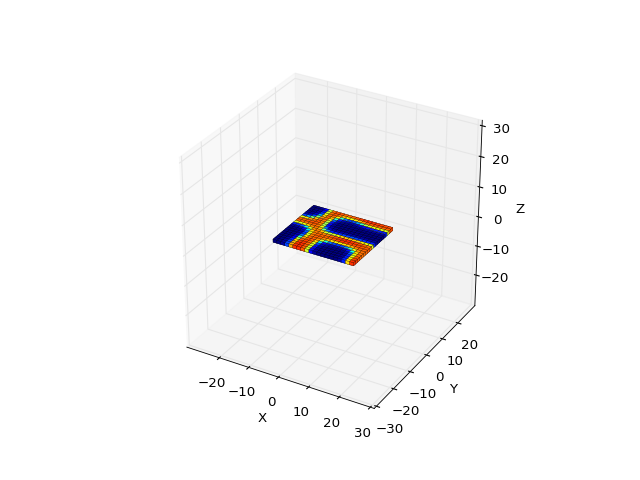

c_a: from 0.000223217687873 to 1.03805222564
c_h: from 2.30506430594 to 3.22897511967
Growth step #3
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 4.45972800255 seconds
Growth of the tissue: 0.576747894287 seconds
Cell divisions: 0.591608047485 seconds


<IPython.core.display.Javascript object>


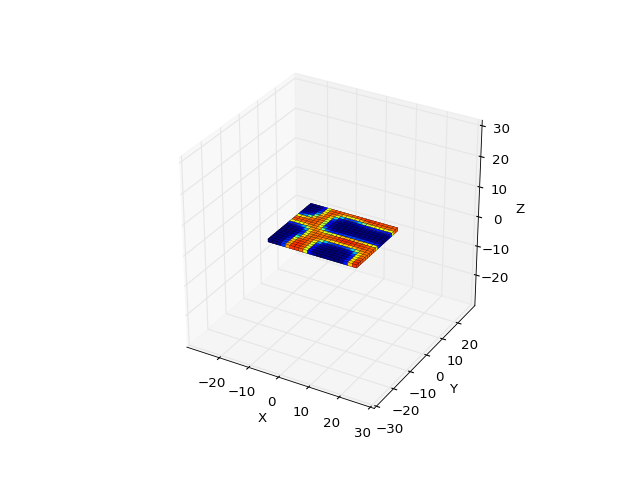

c_a: from 0.000154104969286 to 1.04687191749
c_h: from 1.96402626428 to 2.79689230215
Growth step #4
Jacobian computation: started
Jacobian computation: finished (0.02 s)
Integration of the ODE system: 4.15577101707 seconds
Growth of the tissue: 0.519706010818 seconds
Cell divisions: 3.24567699432 seconds


<IPython.core.display.Javascript object>


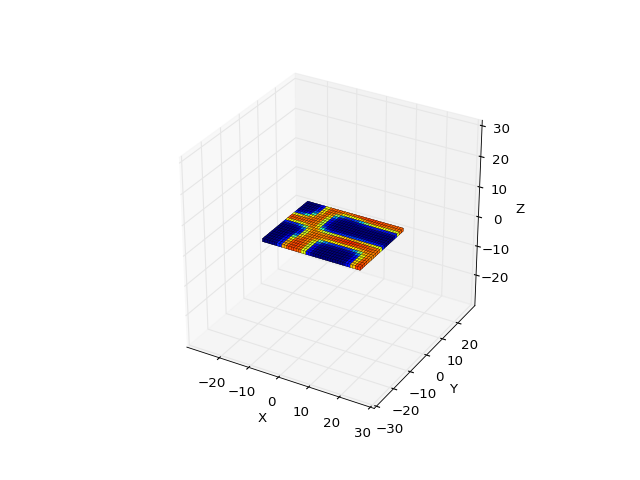

c_a: from 0.00010613258655 to 1.04721668948
c_h: from 1.64173080422 to 2.3942661779
Growth step #5
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Integration of the ODE system: 32.8307490349 seconds
Growth of the tissue: 1.25999903679 seconds
Cell divisions: 1.7177259922 seconds


<IPython.core.display.Javascript object>


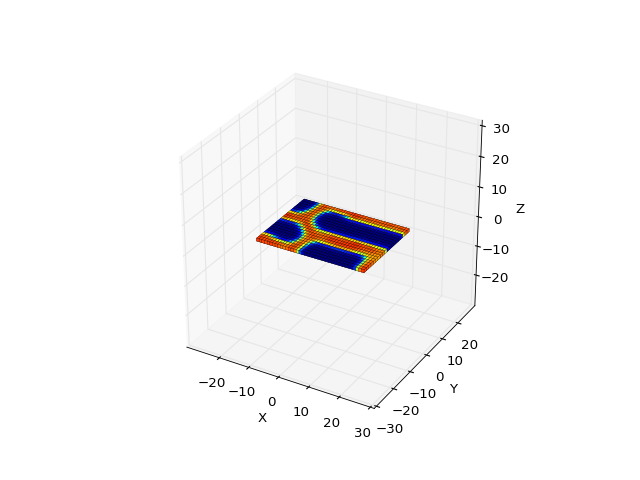

c_a: from 9.85692894725e-05 to 1.02822159249
c_h: from 2.77953662415 to 4.1544779407
Growth step #6
Jacobian computation: started
Jacobian computation: finished (0.07 s)
Integration of the ODE system: 9.78935909271 seconds
Growth of the tissue: 1.28185606003 seconds
Cell divisions: 1.70367193222 seconds


<IPython.core.display.Javascript object>


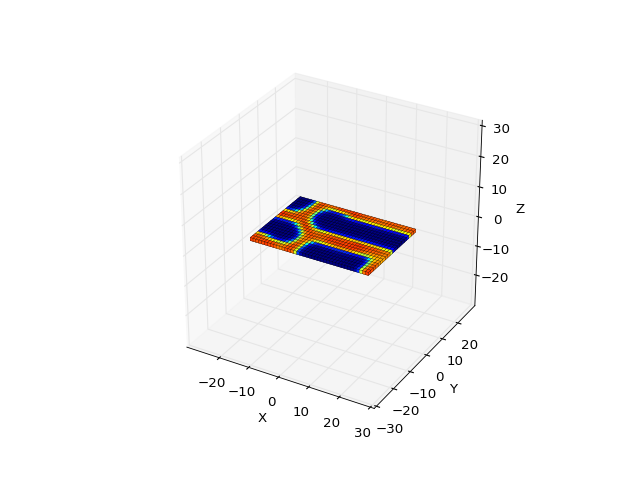

c_a: from 8.15009866603e-05 to 1.03114907527
c_h: from 2.37356270353 to 3.60053338247
Growth step #7
Jacobian computation: started
Jacobian computation: finished (0.10 s)
Integration of the ODE system: 11.1335139275 seconds
Growth of the tissue: 1.26389098167 seconds
Cell divisions: 1.67848300934 seconds


<IPython.core.display.Javascript object>


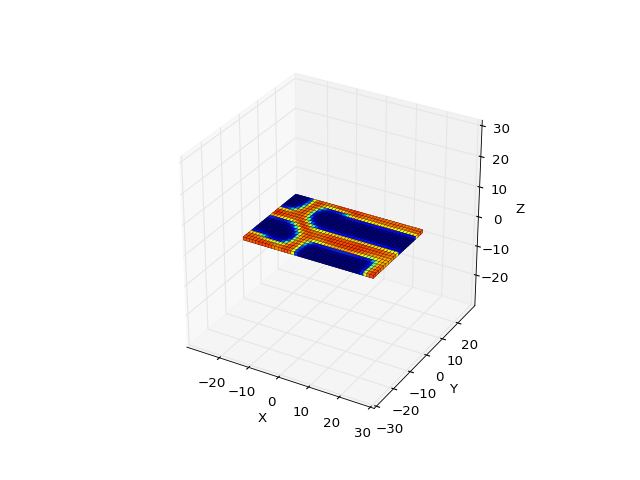

c_a: from 6.07834999151e-05 to 1.03551042083
c_h: from 2.02661738162 to 3.11969947668
Growth step #8
Jacobian computation: started
Jacobian computation: finished (0.09 s)
Integration of the ODE system: 10.083409071 seconds
Growth of the tissue: 1.29431915283 seconds
Cell divisions: 1.66433691978 seconds


<IPython.core.display.Javascript object>


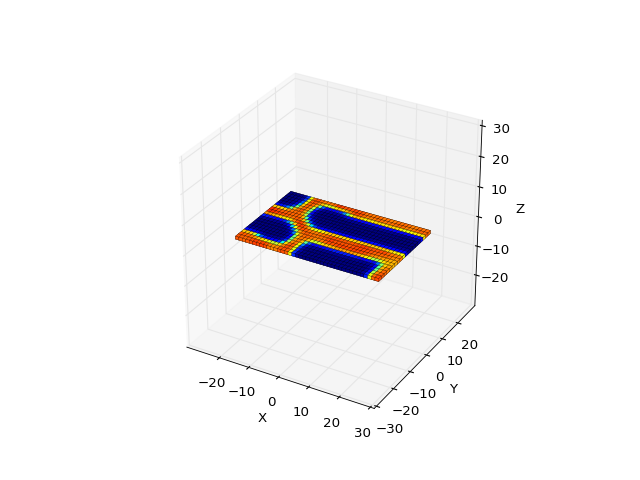

c_a: from 3.82760825973e-05 to 1.04028420755
c_h: from 1.73031559328 to 2.7090467061
Growth step #9
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Integration of the ODE system: 11.5758550167 seconds
Growth of the tissue: 1.26481485367 seconds
Cell divisions: 7.91576099396 seconds


<IPython.core.display.Javascript object>


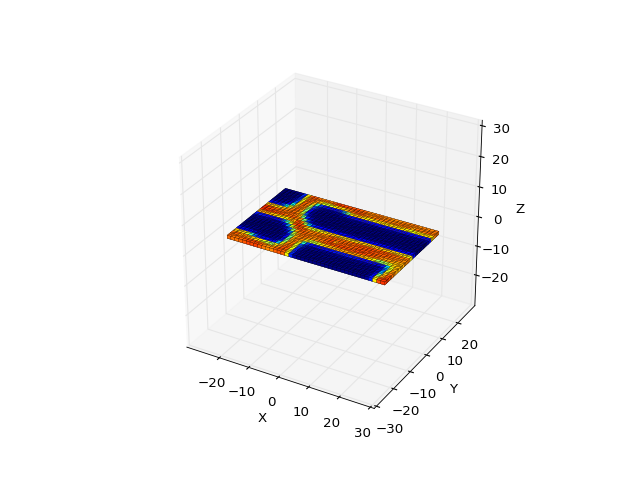

c_a: from 2.47334999908e-05 to 1.03356222969
c_h: from 1.42678768193 to 2.35821948075
Growth step #10
Jacobian computation: started
Jacobian computation: finished (0.22 s)
Integration of the ODE system: 113.517013073 seconds
Growth of the tissue: 2.79231715202 seconds
Cell divisions: 4.47129392624 seconds


<IPython.core.display.Javascript object>


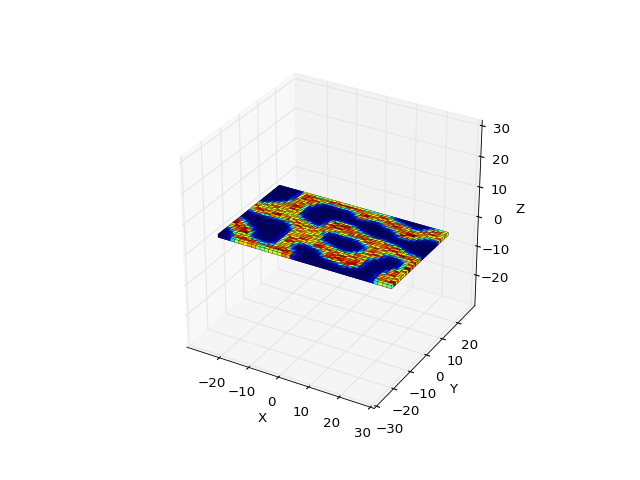

c_a: from 8.3554771638e-06 to 1.28416304447
c_h: from 2.46419192638 to 4.15709924065


In [15]:
sim.simulate()

We can see that as the tissue grows and the cells divide, new ridges of activator engulf into the valleys widened by growth.

Cell divisions do not directly trigger the reorganization of the pattern, because the spatial distribution of chemical species does not actually change (new cells have the same concentrations as former cells and occupy the same space). However, cell divisions modify how far the inhibitor can reach, relatively to the pattern previously achieved. Where it cannot reach, the activator starts being expressed. 